In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("diabetes.csv")  # make sure this file is in your directory
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


📊Basic EDA

Dataset shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFun

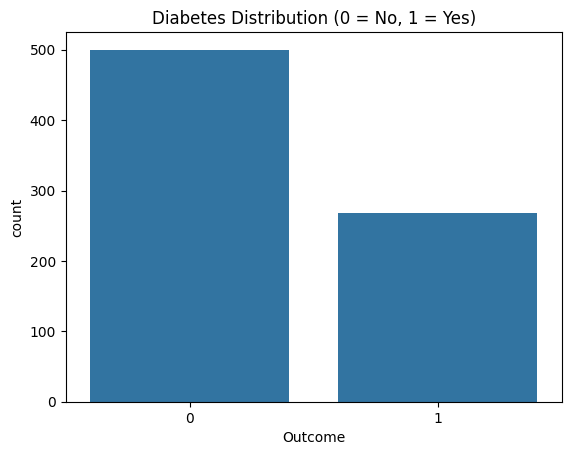

In [6]:
# Shape and info
print("Dataset shape:", df.shape)
df.info()

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Distribution (0 = No, 1 = Yes)")
plt.show()


⚙️ Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features and target
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

# Scale features
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)


🧠 Train SVM Model

Train Accuracy: 0.7866449511400652
Test Accuracy: 0.7727272727272727


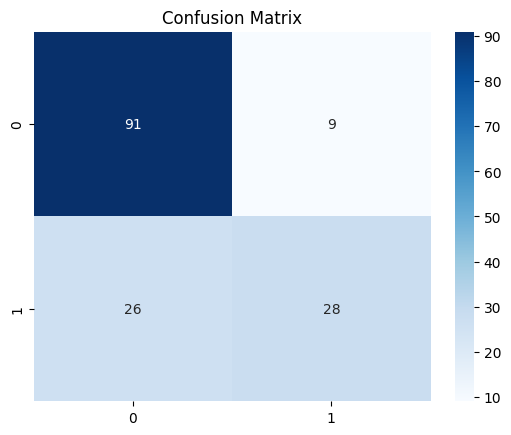


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = SVC(kernel='linear')  # or try 'rbf'
model.fit(X_train, Y_train)

# Evaluate
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Train Accuracy:", accuracy_score(Y_train, train_pred))
print("Test Accuracy:", accuracy_score(Y_test, test_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, test_pred))
